# **Part 1: Understanding the Algorithm**


Name : Pavaris Asawakijtananont

Number : 65340500037

In this homework, you have to implement 4 different function approximation-based RL algorithms:

- **Linear Q-Learning**

- **Deep Q-Network** (DQN)

- **REINFORCE algorithm**

- One algorithm chosen from the following Actor-Critic methods:
    - **Deep Deterministic Policy Gradient** (DDPG)
    - **Advantage Actor-Critic** (A2C)
    - **Proximal Policy Optimization** (PPO)
    - **Soft Actor-Critic** (SAC)

For each algorithm, describe whether it follows a `value-based, policy-based, or Actor-Critic approach`, specify the `type of policy it learns` (stochastic or deterministic), identify the type of `observation space and action space` (discrete or continuous), and `explain how each advanced RL method balances exploration and exploitation`.

ref 
- https://github.com/johnnycode8/gym_solutions
- https://arxiv.org/pdf/1312.5602
- https://huggingface.co/learn/deep-rl-course/unit3/deep-q-algorithm
- https://medium.com/@samina.amin/deep-q-learning-dqn-71c109586bae
- https://www.youtube.com/watch?v=EUrWGTCGzlA

## **Base Function**

## **Linear Q-Learning**

- Q-Learning we have to update throght weight instead of direct to Q value from learning to select the action
- and with linear function approximation we can use feature vector to directly update the action value or weight, this solution can handle with continuous value
 

#### **Updating Method**

We can use the weight value to approximate Q-value by use linear approximation equation, with equation

$$
Q(s,a) = \phi(s)^T w_a
$$

The weight can update by using gradient descent to converge to optimal action from state action pair, which we set the maximum action value along the state for all action to target policy add with reward value.

$$
w = w + \alpha[r + \gamma\max_{a'} Q_\pi(s',a') - Q(s,a)]X(s)
$$

- target policy (same with normal Q Learning) : $r + \gamma\max_{a'} Q_\pi(s',a')$
- direction of gradient : using the observation term(equal to gradient of action value along the weight) to define direction
    - Observation term $X(s) = \nabla_{w} Q(s,a ; w)$

from the equation we can coding in update function

```python
    def update(
        self,
        obs,
        action: int,
        reward: float,
        next_obs,
        next_action: int,
        terminated: bool
    ):
        """
        Updates the weight vector using the Temporal Difference (TD) error 
        in Q-learning with linear function approximation.

        Args:
            obs (dict): The current state observation, containing feature representations.
            action (int): The action taken in the current state.
            reward (float): The reward received for taking the action.
            next_obs (dict): The next state observation.
            next_action (int): The action taken in the next state (used in SARSA).
            terminated (bool): Whether the episode has ended.

        """
        # ========= put your code here ========= #
        q_curr = self.q(obs=obs, action=action)
        if terminated:
            target = reward
        else:
            target = reward + self.discount_factor * np.max(self.q(next_obs))
        pass
    
        error = target - q_curr
        self.training_error.append(error)
        # Gradient descent update
        self.w[:, action] += self.lr * error * obs['policy'].detach().numpy()
        # ====================================== #
```

#### **Action Selection**
- Same as Q Learning , we use the epsilon greedy to select the action to explore or exploit with probability epsilon

```python
    def select_action(self, state):
        """
        Select an action based on an epsilon-greedy policy.
        
        Args:
            state (Tensor): The current state of the environment.
        
        Returns:
            Tensor: The selected action.
        """
        # ========= put your code here ========= #
        if np.random.rand() < self.epsilon:
            # Exploration: choose a random action
            return np.random.randint(0, self.num_of_action)
        else:
            # Exploitation: choose the action with the highest estimated Q-value
            return np.argmax(self.q(state))
```


#### **Question**
- **Approach Type** : Value Based
    - Directly estimated state-action value 
- **Policy Type** : Deterministic (with Stochastic Exploration)
    - Policy choosing the action that maximizes the estimate Q-Value from policy
    - In training process agent learn with epsilon-greedy(probability based)
- **Observation and Action Spaces**
    -   Observation Space: Linear Q-Learning is well-suited for environments with continuous observation spaces where `states are represented by feature vectors`.
    -   Action Space: Discrete only.
- **Balancing Exploration and Exploitation** : Epsilon-Greedy

ref 
- https://github.com/johnnycode8/gym_solutions
- https://arxiv.org/pdf/1312.5602
- https://huggingface.co/learn/deep-rl-course/unit3/deep-q-algorithm
- https://medium.com/@samina.amin/deep-q-learning-dqn-71c109586bae
- https://www.youtube.com/watch?v=EUrWGTCGzlA

## **Deep Q Network**

<div style="text-align: center;">
    <img src="images\Deep-Q-Learning-code.png" alt="Description" width="600">
</div>

#### **Question**
- **Approach Type** : Value Based
- **Policy Type** : Deterministic
    - Policy choosing the action that maximizes the estimate Q-Value from policy
- **Observation and Action Spaces**
    -   Observation Space: discrete or continuous
    -   Action Space: Discrete only
- **Balancing Exploration and Exploitation**
    - Epsilon-greedy : decaying exploration rate over time
    - Experience Replay : store experience buffer and sample mini-batches to update, this method break temporal correlation
    

ref
- https://thammasorn.github.io/2020/06/03/DQN.html
- https://skrl.readthedocs.io/en/latest/api/agents/dqn.html
- https://medium.com/@samina.amin/deep-q-learning-dqn-71c109586bae
- https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html ***

## **REINFORCE**

ref 
- https://thammasorn.github.io/2020/07/30/reinforce.html

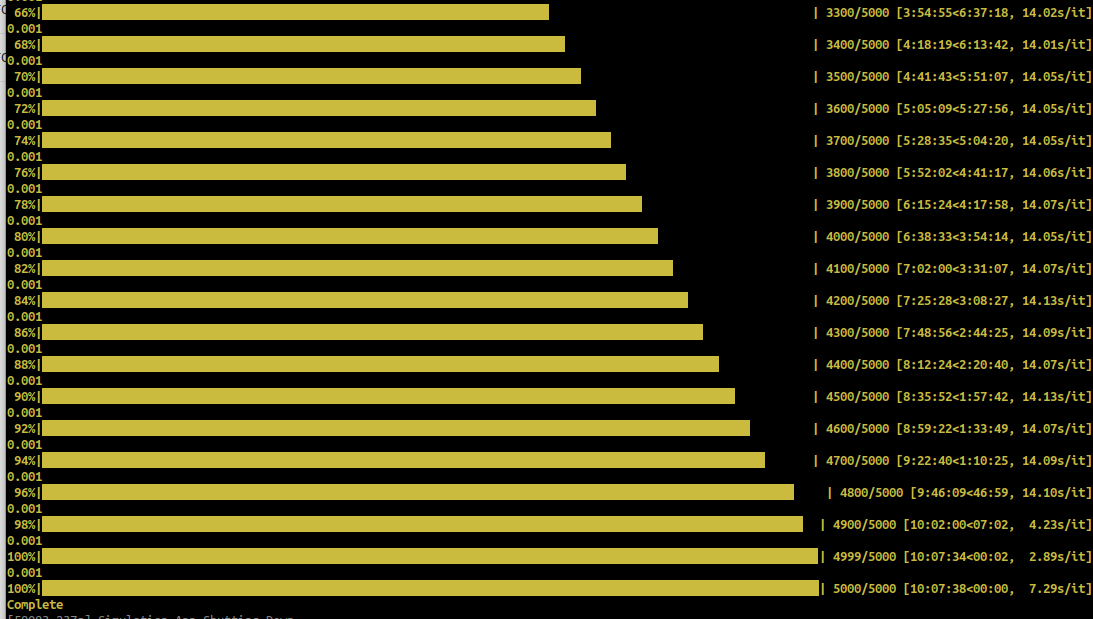

## **Actor Critic :**

ref
- https://joel-baptista.github.io/phd-weekly-report/posts/ac/
